In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [17]:
digits = load_digits()

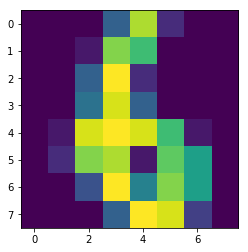

In [18]:
plt.imshow(digits.images[34])
plt.show()

In [19]:
features=[]
for i in range(len(digits.data[0])):
    features.append('P'+str(i))

In [20]:
digits_df=pd.DataFrame(digits.data,columns=features) 

In [22]:
digits_df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    digits_df, # X
    digits.target,  # y
    test_size=0.2, # porcentaje que será prueba
    random_state=42) # para fijar el aleatorio (reproducibilidad)

In [27]:
pca = PCA(n_components=2)
pca.fit(digits_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
print(digits_df.shape)
print(len(pca.components_[0]))
pca_df = pd.DataFrame(pca.transform(digits_df),columns=['p1','p2'])

(1797, 64)
64


In [35]:
pca_df['target']=digits.target

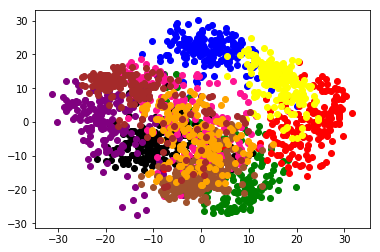

In [49]:
colores = ['blue','green','black','purple','red','deeppink','yellow',
           'sienna','orange','brown']
for i in range(10):
    tmp=pca_df.query("target == '"+str(i)+"'")
    plt.scatter(tmp.p1,tmp.p2,c=colores[i])
    
plt.show()

In [50]:
tsne = TSNE(n_components=2)

In [51]:
ts2 = pd.DataFrame(tsne.fit_transform(digits_df),
                   columns=['tsne1', 'tsne2'])

In [52]:
ts2['target']=digits.target

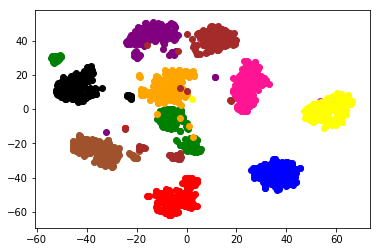

In [53]:
for i in range(10):
    tmp=ts2.query("target == '"+str(i)+"'")
    plt.scatter(tmp.tsne1,tmp.tsne2,c=colores[i])
    
plt.show()

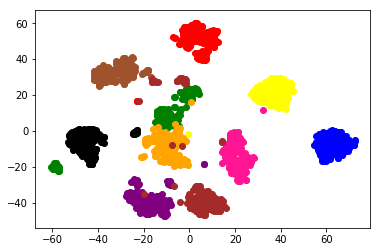

In [54]:
tsne = TSNE(n_components=2,metric='cosine')
ts2 = pd.DataFrame(tsne.fit_transform(digits_df),
                   columns=['tsne1', 'tsne2'])
ts2['target']=digits.target
for i in range(10):
    tmp=ts2.query("target == '"+str(i)+"'")
    plt.scatter(tmp.tsne1,tmp.tsne2,c=colores[i])
    
plt.show()

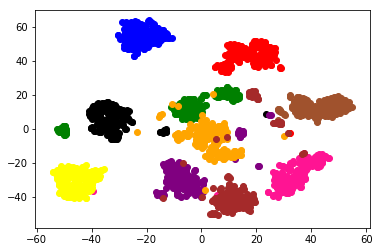

In [55]:
tsne = TSNE(n_components=2,metric='cityblock')
ts2 = pd.DataFrame(tsne.fit_transform(digits_df),
                   columns=['tsne1', 'tsne2'])
ts2['target']=digits.target
for i in range(10):
    tmp=ts2.query("target == '"+str(i)+"'")
    plt.scatter(tmp.tsne1,tmp.tsne2,c=colores[i])
    
plt.show()

In [56]:
col=pd.DataFrame(list(range(10)),columns=['target'])
col['color']=colores
col

,target,color
0,0,blue
1,1,green
2,2,black
3,3,purple
4,4,red
5,5,deeppink
6,6,yellow
7,7,sienna
8,8,orange
9,9,brown


In [57]:
from sklearn.cluster import KMeans

In [59]:
km = KMeans(n_clusters=10)
km.fit(digits_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
ts2['cluster']=km.labels_

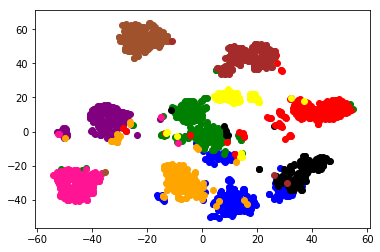

In [69]:
for i in range(10):
    tmp=ts2.query("cluster == '"+str(i)+"'")
    plt.scatter(tmp.tsne1,tmp.tsne2,c=colores[i])
    
plt.show()

In [79]:
(ts2
 .groupby(['cluster','target'])
 .count()
 .reset_index()
 .drop('tsne2',axis=1)
 .rename(index=str, columns={"tsne1": "count"})
 .sort_values(['cluster', 'count'],ascending=[True,False]))

,cluster,target,count
4,0,9,140
3,0,8,50
2,0,5,43
1,0,3,13
0,0,2,2
11,1,8,102
5,1,1,99
6,1,2,8
7,1,3,7
9,1,6,3


comparar con etiquetas
regresión logística
Graficar los parámetros
Modelos de clasificación